In [1]:
import sys
import os

# Add project root to path
project_root = os.path.abspath(os.path.join(os.getcwd(), '../..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [2]:
from src.models.transcription import TranscriptionService
from src.models.diarization import SpeakerDiarizationService
from src.processing.transcript_processor import TranscriptProcessor

# Initialize services
transcription_service = TranscriptionService()
diarization_service = SpeakerDiarizationService()
processor = TranscriptProcessor()

/opt/conda/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/opt/conda/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/opt/conda/lib/python3.10/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might invo

In [3]:
sample = "../../data/test_data/long_conversation.mp3"

In [4]:
sample_transcription = transcription_service.transcribe_with_chunks(sample)
print(len(sample_transcription))
sample_diarization = diarization_service.diarize(sample)
print(len(sample_diarization))
sample_transcript = processor.merge_transcription_with_speakers(sample_transcription, sample_diarization)

# Display results
print(sample_transcript)

KeyboardInterrupt: 

In [ ]:
for some in sample_transcription:
    print(some)

{'timestamp': (0.0, 3.0), 'text': " I don't know if you know this, but some people call you a fascist."}
{'timestamp': (3.26, 3.94), 'text': ' Yeah, they do.'}
{'timestamp': (4.16, 6.42), 'text': " So I figure it's all right to call them a communist."}
{'timestamp': (6.6, 8.66), 'text': ' Yeah, they call me a lot worse than I call them.'}
{'timestamp': (8.66, 15.24), 'text': " A lot of people listening to this, myself included, that doesn't think that Kamala is a communist."}
{'timestamp': (15.54, 17.8), 'text': ' I believe you have to fight fire with fire.'}
{'timestamp': (17.92, 19.32), 'text': ' Politics is a dirty game.'}
{'timestamp': (19.46, 20.56), 'text': ' It is a dirty game.'}
{'timestamp': (20.78, 21.8), 'text': " It's certainly true."}
{'timestamp': (21.98, 23.26), 'text': ' How do you win at that game?'}
{'timestamp': (23.92, 0.0), 'text': ''}
{'timestamp': (11.58, 12.12), 'text': " They suffer from massive Trump derangement syndrome, TDS, and I don't know if it's curable 

In [6]:
for some in sample_diarization:
    print(some)

{'start': 0.03096875, 'end': 3.03471875, 'speaker': 'SPEAKER_00'}
{'start': 3.25409375, 'end': 8.77221875, 'speaker': 'SPEAKER_01'}
{'start': 8.805968750000002, 'end': 15.488468750000003, 'speaker': 'SPEAKER_00'}
{'start': 15.555968750000002, 'end': 17.88471875, 'speaker': 'SPEAKER_01'}
{'start': 17.88471875, 'end': 18.72846875, 'speaker': 'SPEAKER_00'}
{'start': 18.72846875, 'end': 19.16721875, 'speaker': 'SPEAKER_01'}
{'start': 19.16721875, 'end': 20.61846875, 'speaker': 'SPEAKER_00'}
{'start': 20.719718750000002, 'end': 21.91784375, 'speaker': 'SPEAKER_01'}
{'start': 21.91784375, 'end': 23.352218750000002, 'speaker': 'SPEAKER_00'}
{'start': 23.95971875, 'end': 34.92846875, 'speaker': 'SPEAKER_01'}
{'start': 35.33346875, 'end': 41.02034375, 'speaker': 'SPEAKER_00'}
{'start': 41.15534375, 'end': 52.697843750000004, 'speaker': 'SPEAKER_01'}
{'start': 52.697843750000004, 'end': 56.798468750000005, 'speaker': 'SPEAKER_00'}
{'start': 57.67596875, 'end': 60.612218750000004, 'speaker': 'SPE

In [6]:
processor.format_transcript_for_display(sample_transcript)

"SPEAKER_00 [0.00s - 3.00s]: I don't know if you know this, but some people call you a fascist.\nSPEAKER_01 [3.26s - 3.94s]: Yeah, they do.\nSPEAKER_01 [4.16s - 6.42s]: So I figure it's all right to call them a communist.\nSPEAKER_01 [6.60s - 8.66s]: Yeah, they call me a lot worse than I call them.\nSPEAKER_00 [8.66s - 15.24s]: A lot of people listening to this, myself included, that doesn't think that Kamala is a communist.\nSPEAKER_01 [15.54s - 17.80s]: I believe you have to fight fire with fire.\nSPEAKER_00 [17.92s - 19.32s]: Politics is a dirty game.\nSPEAKER_00 [19.46s - 20.56s]: It is a dirty game.\nSPEAKER_01 [20.78s - 21.80s]: It's certainly true.\nSPEAKER_00 [21.98s - 23.26s]: How do you win at that game?\nSPEAKER_00 [11.58s - 12.12s]: They suffer from massive Trump derangement syndrome, TDS, and I don't know if it's curable from their standpoint.\nSPEAKER_01 [17.50s - 17.88s]: I think we'd probably have a better world if everybody in Congress took some mushrooms, perhaps.\nSP

In [ ]:
from src.clustering.semantic_cluster import SemanticCluster

cluster_service = SemanticCluster(
    clustering_algorithm="dbscan"
)

clusters = cluster_service.cluster_chunks(
    sample_transcript,
    distance_threshold=0.9,
    consider_speakers=False,
    min_cluster_size=1
)

print(clusters)

INFO:datasets:PyTorch version 2.6.0 available.
INFO:sentence_transformers.SentenceTransformer:Use pytorch device_name: cuda
INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-mpnet-base-v2


Batches:   0%|          | 0/30 [00:00<?, ?it/s]

[[{'timestamp': (0.0, 3.0), 'text': " I don't know if you know this, but some people call you a fascist.", 'speaker': 'SPEAKER_00'}], [{'timestamp': (0.0, 5.86), 'text': ' And now, if you talked about people in the business and politics going into business,', 'speaker': 'SPEAKER_00'}], [{'timestamp': (0.0, 1.4), 'text': ' lost by a whisker.', 'speaker': 'SPEAKER_00'}], [{'timestamp': (0.0, 8.16), 'text': " leverage of, let's say, friendship, the carrot or the stick? Friendship or sort of the threat", 'speaker': 'SPEAKER_01'}], [{'timestamp': (0.0, 1.68), 'text': ' And nobody thought it was going to be her.', 'speaker': 'SPEAKER_00'}], [{'timestamp': (0.0, 2.34), 'text': " You know, we're in a lot of trouble.", 'speaker': 'SPEAKER_00'}], [{'timestamp': (0.0, 3.24), 'text': ' and there are lots of ways to solve this problem.', 'speaker': 'SPEAKER_00'}], [{'timestamp': (0.0, 7.98), 'text': ' now bad things like, which is important. Afghanistan was, in my opinion, the most', 'speaker': 'SP

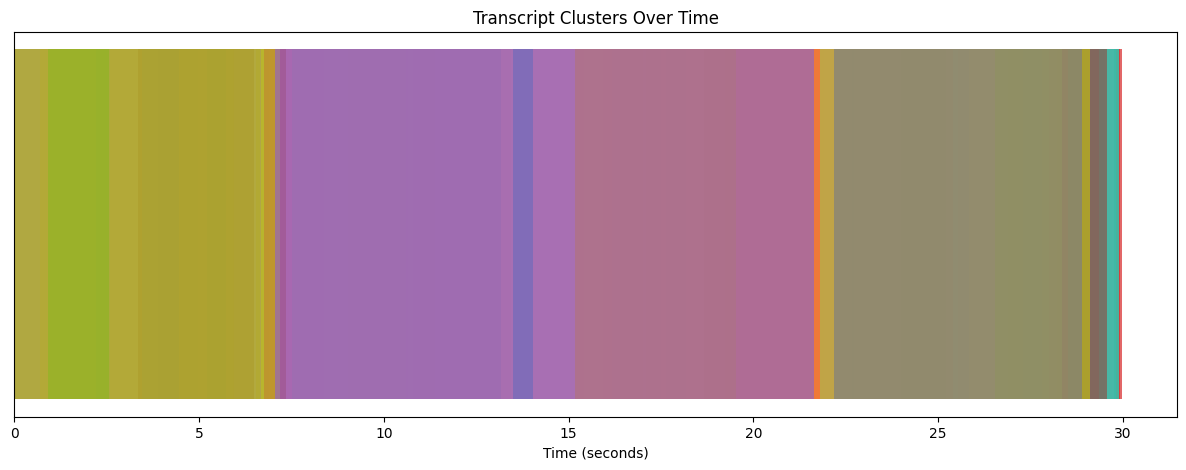

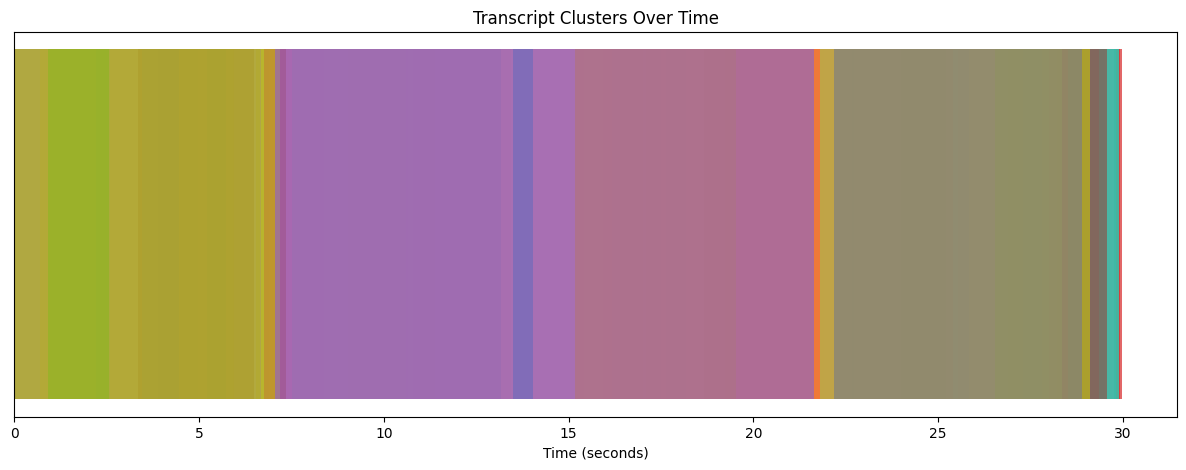

In [ ]:
cluster_service.visualize_clusters(sample_transcript, clusters)